## Natural Language Processing

#### Definition

Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.



### Data set information

Restaurant reviews dataset:- <br>This dataset contains two features(columns)as Review and Liked ,1000 rows  and 2000 thousand datapoints.

In [24]:
# importing nltk library
import nltk

### Reading and Exploring the dataset

In [25]:
# Reading the raw data
rawdata=open("Restaurant_Reviews.tsv").read()
rawdata[1:1001]

"eview\tLiked\nWow... Loved this place.\t1\nCrust is not good.\t0\nNot tasty and the texture was just nasty.\t0\nStopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\nThe selection on the menu was great and so were the prices.\t1\nNow I am getting angry and I want my damn pho.\t0\nHoneslty it didn't taste THAT fresh.)\t0\nThe potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\nThe fries were great too.\t1\nA great touch.\t1\nService was very prompt.\t1\nWould not go back.\t0\nThe cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\nI tried the Cape Cod ravoli, chicken, with cranberry...mmmm!\t1\nI was disgusted because I was pretty sure that was human hair.\t0\nI was shocked because no signs indicate cash only.\t0\nHighly recommended.\t1\nWaitress was a little slow in service.\t0\nThis place is not worth your time, let alone Vegas.\t0\ndid not

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the dataset
data=pd.read_csv("D:\\mail downloads\\NLP\\Restaurant_Reviews.tsv",delimiter="\t",quoting=3)
data.head(2)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0


### Pre-Processing the Data

#### 1. Remove the punctuation Marks<br>
For more Information click here.[punctuation](https://en.wikipedia.org/wiki/Punctuation)<br>
 It removes The all Punctuation marks(!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)


In [28]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


The above are the all punctuation marks

In [29]:
# Function to remove punctuation
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation]) # It will discard all punctuation
    return text_nopunct
data["Review_clean"]=data["Review"].apply(lambda x:remove_punct(x))
data.head(2)

,Review,Liked,Review_clean
0,Wow... Loved this place.,1,Wow Loved this place
1,Crust is not good.,0,Crust is not good


#### 2. Tokenization<br>
It Splits the Sentences into **words**.<br>
For more informattion click here.[Tokenization](https://www.guru99.com/tokenize-words-sentences-nltk.html)

In [30]:
import re
# Function to Tokenize  words
def tokenize(text):
    tokens=re.split('\W+', text) # w+ means that either a word character (A-Z,a-z,0-9)
    return tokens
data["Review_tokenized"]=data["Review_clean"].apply(lambda x:tokenize(x))
data.head(2)


,Review,Liked,Review_clean,Review_tokenized
0,Wow... Loved this place.,1,Wow Loved this place,"[Wow, Loved, this, place]"
1,Crust is not good.,0,Crust is not good,"[Crust, is, not, good]"


#### 3. Remove Stop words<br>
It Removes the **Stop Words**.<br>
For more information click here[Stop Words](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/).

In [31]:
import nltk
stopwords=nltk.corpus.stopwords.words("english") # All englishwords


In [32]:
# Function to remove stopwords
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords] # To remove all stopwords
    return text
data["Review_nostop"]=data["Review_tokenized"].apply (lambda x:remove_stopwords(x))
data.head(2)


,Review,Liked,Review_clean,Review_tokenized,Review_nostop
0,Wow... Loved this place.,1,Wow Loved this place,"[Wow, Loved, this, place]","[Wow, Loved, place]"
1,Crust is not good.,0,Crust is not good,"[Crust, is, not, good]","[Crust, good]"


### Stemming<br>
It reduce a word to its **stem form**.It removes suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. It reduces the corpus of words but often the actual words get neglected. eg: Entitling,Entitled->Entitl<br>
For more information [Stemming](https://www.geeksforgeeks.org/python-stemming-words-with-nltk/)

In [33]:
ps=nltk.PorterStemmer()
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text
data["Review_stemmed"]=data["Review_nostop"].apply(lambda x:stemming(x))
data.head(2)

,Review,Liked,Review_clean,Review_tokenized,Review_nostop,Review_stemmed
0,Wow... Loved this place.,1,Wow Loved this place,"[Wow, Loved, this, place]","[Wow, Loved, place]","[wow, love, place]"
1,Crust is not good.,0,Crust is not good,"[Crust, is, not, good]","[Crust, good]","[crust, good]"


#### Lemmatizing<br>
It derives the canonical form (‘lemm).a’) of a word. i.e the root form. It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word.eg: Entitling, Entitled->Entitle.<br>
For more information [Lemmatization](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/).


nltk.download()<br>
In order to download **wordnet** and different packages for different **NLP** using the above code


In [34]:
wn=nltk.WordNetLemmatizer()
 
def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text
data["Review_lemmatized"]=data["Review_nostop"].apply(lambda x:lemmatizing(x))
data.head(2)

,Review,Liked,Review_clean,Review_tokenized,Review_nostop,Review_stemmed,Review_lemmatized
0,Wow... Loved this place.,1,Wow Loved this place,"[Wow, Loved, this, place]","[Wow, Loved, place]","[wow, love, place]","[Wow, Loved, place]"
1,Crust is not good.,0,Crust is not good,"[Crust, is, not, good]","[Crust, good]","[crust, good]","[Crust, good]"


### vectorizing the data: Bag of words<br>
You need to convert these text into some numbers or vectors of numbers. Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document.


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_counts=count_vect.fit_transform(data["Review"])
print(X_counts.shape)
#print(count_vect.get_features_names())


(1000, 2035)


### Vectorizing data:N-grams<br>
It is a set of co-occurring or continuous sequence of n items from a sequence of large text or sentence. The item here could be words, letters, and syllables. 1-gram is also called as unigrams are the unique words present in the sentence. Bigram(2-gram) is the combination of 2 words. Trigram(3-gram) is 3 words and so on.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect=CountVectorizer(ngram_range=(2,2))
X_counts=ngram_vect.fit_transform(data['Review'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(1000, 6691)
['10 minutes', '10 times', '100 recommended', '100 times', '11 99', '12 ridiculous', '15 minutes', '17 burger', '1979 and', '20 minutes', '20 you', '2007 and', '23 which', '30 min', '30 minutes', '30s and', '35 big', '35 minutes', '40 and', '40 bucks', '40 minutes', '40min passed', '45 minutes', '4ths gristle', '5lb piece', '70 when', '85 for', '90 has', '99 for', 'about 10', 'about 20', 'about great', 'about half', 'about here', 'about on', 'about our', 'about taste', 'about the', 'about this', 'about two', 'about was', 'about working', 'above and', 'above average', 'absolute must', 'absolutely amazing', 'absolutely be', 'absolutely delicious', 'absolutely flat', 'absolutely no', 'absolutely stars', 'absolutley fantastic', 'accident and', 'accommodations for', 'accomodate for', 'accountant to', 'ache and', 'acknowledged then', 'actual experience', 'actually rare', 'added extra', 'added gratuity', 'affordable prices', 'after 10', 'after 20', 'after all', 'after going', 'af

#### Vectorizing Data:TF-IDF<br>
It computes “relative frequency” that a word appears in a document compared to its frequency across all documents. It is more useful than “term frequency” for identifying “important” words in each document (high frequency in that document, low frequency in other documents).<br>
NLTK does not support tf-idf. So, we're going to use scikit-learn. The scikit-learn has a built in tf-Idf implementation while we still utilize NLTK's tokenizer and stemmer to preprocess the text.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer()
X_tfidf=tfidf_vect.fit_transform(data['Review'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())
 

(1000, 2035)
['00', '10', '100', '11', '12', '15', '17', '1979', '20', '2007', '23', '30', '30s', '35', '40', '40min', '45', '4ths', '5lb', '70', '85', '90', '99', 'about', 'above', 'absolute', 'absolutely', 'absolutley', 'accident', 'accommodations', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'across', 'actual', 'actually', 'added', 'affordable', 'after', 'afternoon', 'again', 'ago', 'ahead', 'airline', 'airport', 'ala', 'albondigas', 'all', 'allergy', 'almonds', 'almost', 'alone', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'ambience', 'amount', 'ample', 'an', 'and', 'andddd', 'angry', 'annoying', 'another', 'anticipated', 'any', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'approval', 'are', 'area', 'aren', 'arepas', 'aria', 'around', 'array', 'arrived', 'arrives', 'arriving', 'article', 'as', 'ask'

#### Feature Creation<br>
Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It is like an art as it requires domain knowledge and it can tough to create features, but it can be fruitful for ML algorithm to predict results as they can be related to the prediction.


In [38]:
import string
# Function to calculate length of message excluding space
data["Review_len"]=data["Review"].apply(lambda x: len(x)-x.count(" "))
#print(dataset.head(2))

def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
data["punct%"] = data["Review"].apply(lambda x:count_punct(x))
data.head(2)


,Review,Liked,Review_clean,Review_tokenized,Review_nostop,Review_stemmed,Review_lemmatized,Review_len,punct%
0,Wow... Loved this place.,1,Wow Loved this place,"[Wow, Loved, this, place]","[Wow, Loved, place]","[wow, love, place]","[Wow, Loved, place]",21,19.0
1,Crust is not good.,0,Crust is not good,"[Crust, is, not, good]","[Crust, good]","[crust, good]","[Crust, good]",15,6.7


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


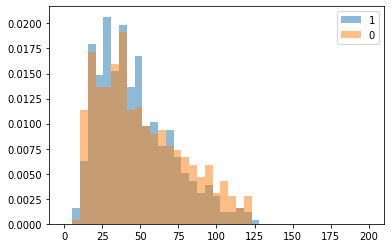

In [39]:
bins=np.linspace(0,200,40)
plt.hist(data[data['Liked']==1]['Review_len'],bins,alpha=0.5,normed=True,label=1)
plt.hist(data[data['Liked']==0]['Review_len'],bins,alpha=0.5,normed=True,label=0)
plt.legend(loc="upper right")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


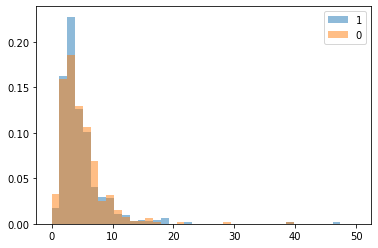

In [40]:
bins=np.linspace(0,50,40)
plt.hist(data[data['Liked']==1]['punct%'],bins,alpha=0.5,normed=True,label=1)
plt.hist(data[data['Liked']==0]['punct%'],bins,alpha=0.5,normed=True,label=0)
plt.legend(loc="upper right")
plt.show()

#### Model Selection<br>
We use an ensemble method of machine learning where multiple models are used and their combination produces better results than a single model(Support Vector Machine/Naive Bayes). Ensemble methods are the first choice for many Kaggle Competitions. Random Forest i.e multiple random decision trees are constructed and the aggregates of each tree are used for the final prediction. It can be used for classification as well as regression problems. It follows a bagging strategy where randomly.

**Grid-search**: It exhaustively searches overall parameter combinations in a given grid to determine the best model.



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
param={'n_estimators':[10,150,300],'max_depth':[30,60,90,None]}
gs=GridSearchCV(rf,param,cv=5,n_jobs=-1)# For parallelizing the speech
gs_fit=gs.fit(X_counts,data['Liked'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,3.187570,0.021920,0.054569,0.001356,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.645,0.650,0.725,0.705,0.655,0.676,0.032619,1
8,6.356751,0.042659,0.105140,0.002785,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.690,0.685,0.690,0.695,0.620,0.676,0.028178,1
1,1.532320,0.019973,0.048573,0.006115,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.660,0.700,0.715,0.685,0.600,0.672,0.040324,3
4,2.524750,0.067636,0.048572,0.000799,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.680,0.665,0.675,0.700,0.610,0.666,0.030232,4
5,4.943763,0.083188,0.095145,0.002481,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.635,0.675,0.675,0.705,0.625,0.663,0.029257,5


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
param={'n_estimators':[10,150,300],'max_depth':[30,60,90,None]}
gs=GridSearchCV(rf,param,cv=5,n_jobs=-1)# For parallelizing the speech
gs_fit=gs.fit(X_tfidf,data['Liked'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.791771,0.019302,0.048972,0.001548,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.790,0.790,0.775,0.815,0.765,0.787,0.016912,1
11,3.483202,0.403383,0.082156,0.015209,None,300,"{'max_depth': None, 'n_estimators': 300}",0.770,0.785,0.770,0.810,0.785,0.784,0.014629,2
8,3.593937,0.034185,0.101741,0.006302,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.755,0.785,0.770,0.830,0.760,0.780,0.027019,3
10,1.889915,0.023233,0.051970,0.003845,None,150,"{'max_depth': None, 'n_estimators': 150}",0.775,0.785,0.765,0.825,0.750,0.780,0.025298,3
5,3.272721,0.043640,0.093946,0.002365,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.760,0.775,0.765,0.835,0.755,0.778,0.029257,5


In [43]:
corpus=X_counts
X = corpus.toarray()
y = data.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
gs.fit(X_train, y_train)

# Predicting the Test set results
y_pred = gs.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [44]:
print(cm)

[[79 18]
 [52 51]]


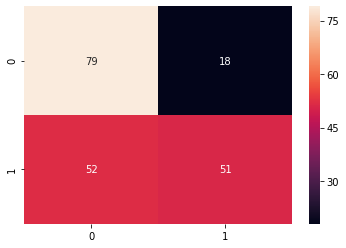

In [45]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [46]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.81      0.69        97
           1       0.74      0.50      0.59       103

    accuracy                           0.65       200
   macro avg       0.67      0.65      0.64       200
weighted avg       0.67      0.65      0.64       200



## Conclusion

Hence we get 65% Accuracy by using Random Forest Classifier due to the uniqueness we cant get more than 60% Accuracy in order to improve we need to use rating system that far improves the information in our training data so that we can get more Accuracy 